## CAPSTONE PROJECT :- 1 :- (RELATED TO MACHINE LEARNING:-REGRESSION PROBLEM)

## CAPSTONE PROJECT NAME :- CROP YIELD PREDICTION

### CREATED BY :- JAYASHRI PACHARANE,  DATE :- 25TH NOV.2024

In [1]:
from IPython import display
display.Image("C:\\Users\\DELL\\Downloads\\Crop_yeild_Image.jpg")

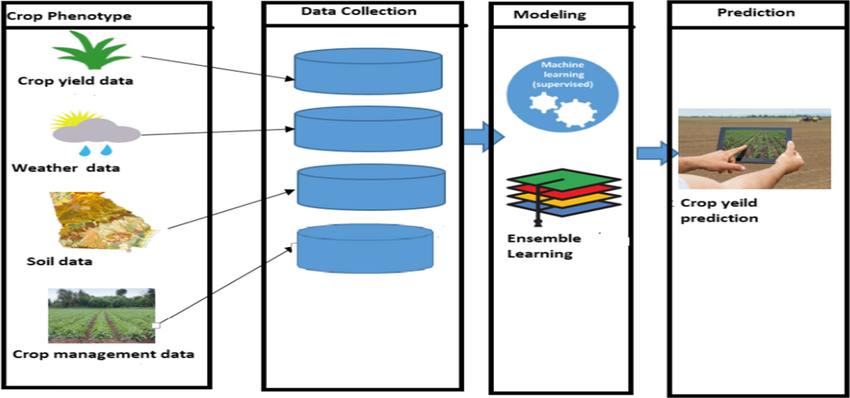

In [2]:
from IPython import display
display.Image("C:\\Users\\DELL\\Downloads\\crop_yield_prediction_image.png")

## PROBLEM STATEMENT :-

        This dataset encompasses agricultural data for multiple crops cultivated across various states in India from the year 
            1997 till 2020.
        The dataset provides crucial features related to crop yield prediction, including crop types, crop years, cropping seasons,
        states, areas under cultivation, production quantities, annual rainfall, fertilizer usage, pesticide
           usage, and calculated yields.


## COLUMNS DESCRIPTION:-
                      1.Crop:- The name of the crop cultivated.

                      2.Crop_Year:- The year in which the crop was grown.

                      3.Season:- The specific cropping season (e.g., Kharif, Rabi, Whole Year).

                      4.State:- The Indian state where the crop was cultivated.

                      5.Area:- The total land area (in hectares) under cultivation for the specific crop.

                      6.Production:- The quantity of crop production (in metric tons).

                      7.Annual_Rainfall:- The annual rainfall received in the crop-growing region (in mm).

                      8.Fertilizer:- The total amount of fertilizer used for the crop (in kilograms).
                     
                      9.Pesticide:- The total amount of pesticide used for the crop (in kilograms).

                     10.Yield:- The calculated crop yield (production per unit area).



## IMPORTING LIBRARIES AND DATA :-

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline


pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

### Loading the data from csv file to a Pandas DataFrame :-


In [4]:
# loading the data from csv file to a Pandas DataFrame

df = pd.read_csv('crop_yield.csv')

In [5]:
df.head(10)

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   
5  Dry chillies       1997  Whole Year   Assam  13587.0        9073   
6          Gram       1997  Rabi         Assam   2979.0        1507   
7          Jute       1997  Kharif       Assam  94520.0      904095   
8       Linseed       1997  Rabi         Assam  10098.0        5158   
9         Maize       1997  Kharif       Assam  19216.0       14721   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
5           2051.4  1293074.79    4211.97     0.643636  
6           2051.4   283511.43     923.49     0.465455  
7           2051.4  8995468.40   29301.20     9.919565  
8           2051.4   961026.66    3130.38     0.461364  
9           2051.4  1828786.72    5956.96     0.615652

## EDA PART :-

### First 5 rows of the dataframe :-

In [6]:
# first 5 rows of the dataframe
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

### Last 5 rows of the dataframe :-

In [7]:
# Last 5 rows of the dataframe
df.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

### Check the number of rows and columns :-

In [8]:
# number of rows and columns

print("Shape of the dataset : ",df.shape)


Shape of the dataset :  (19689, 10)


### Checking data types :-

In [9]:
# Checking data types

df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

### Getting some informations about the dataset :-

In [10]:
# Getting some informations about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### Check the duplicate records :-

In [11]:
# Check the duplicate records

df.duplicated().sum()

0

### Check the all columns :-

In [12]:
# Check the all columns

df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

### Statistical Measures of the dataset :-

In [13]:
# statistical Measures of the dataset

pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

count        mean          std     min       25%  \
Crop_Year       19689.00     2009.13         6.50 1997.00   2004.00   
Area            19689.00   179926.57    732828.68    0.50   1390.00   
Production      19689.00 16435941.27 263056839.81    0.00   1393.00   
Annual_Rainfall 19689.00     1437.76       816.91  301.30    940.70   
Fertilizer      19689.00 24103312.45  94946004.48   54.17 188014.62   
Pesticide       19689.00    48848.35    213287.35    0.09    356.70   
Yield           19689.00       79.95       878.31    0.00      0.60   

                       50%         75%           max  
Crop_Year          2010.00     2015.00       2020.00  
Area               9317.00    75112.00   50808100.00  
Production        13804.00   122718.00 6326000000.00  
Annual_Rainfall    1247.60     1643.70       6552.70  
Fertilizer      1234957.44 10003847.20 4835406877.00  
Pesticide          2421.90    20041.70   15750511.00  
Yield                 1.03        2.39      21105.00

In [14]:
df.describe(include=["object"]).T

count unique          top  freq
Crop    19689     55         Rice  1197
Season  19689      6  Kharif       8232
State   19689     30    Karnataka  1432

### Check the categorical columns :-

In [15]:
# Check the categorical columns

obj_df = df.select_dtypes(include=[object]).columns

In [16]:
obj_df

Index(['Crop', 'Season', 'State'], dtype='object')

### Check the numerical data :-

In [17]:
# Check the numerical data

numerical_data=df.select_dtypes(include=['float64','int64']).columns.tolist()

In [18]:
numerical_data

['Crop_Year',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield']

### SEPARATE NUMERICAL AND CATEGORICALVARIABLES:-

In [19]:
numerical_data = df.select_dtypes(include=[np.number])
numerical_data.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 73814.00       56708          2051.40  7024878.38   22882.34   
1       1997  6637.00        4685          2051.40   631643.29    2057.47   
2       1997   796.00          22          2051.40    75755.32     246.76   
3       1997 19656.00   126905000          2051.40  1870661.52    6093.36   
4       1997  1739.00         794          2051.40   165500.63     539.09   

    Yield  
0    0.80  
1    0.71  
2    0.24  
3 5238.05  
4    0.42

In [20]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

Crop       Season  State
0      Arecanut  Whole Year   Assam
1     Arhar/Tur  Kharif       Assam
2   Castor seed  Kharif       Assam
3      Coconut   Whole Year   Assam
4  Cotton(lint)  Kharif       Assam

### CORRELATION MATRIX OF NUMERICAL DATA:-

In [21]:
numerical_data.corr()

Crop_Year  Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year             1.00 -0.04        0.00            -0.01        0.01   
Area                 -0.04  1.00        0.04            -0.11        0.97   
Production            0.00  0.04        1.00             0.03        0.04   
Annual_Rainfall      -0.01 -0.11        0.03             1.00       -0.11   
Fertilizer            0.01  0.97        0.04            -0.11        1.00   
Pesticide            -0.00  0.97        0.04            -0.10        0.95   
Yield                 0.00  0.00        0.57             0.02        0.00   

                 Pesticide  Yield  
Crop_Year            -0.00   0.00  
Area                  0.97   0.00  
Production            0.04   0.57  
Annual_Rainfall      -0.10   0.02  
Fertilizer            0.95   0.00  
Pesticide             1.00   0.00  
Yield                 0.00   1.00

### VISUALIZATION OF CORRELATION HEATMAP:-

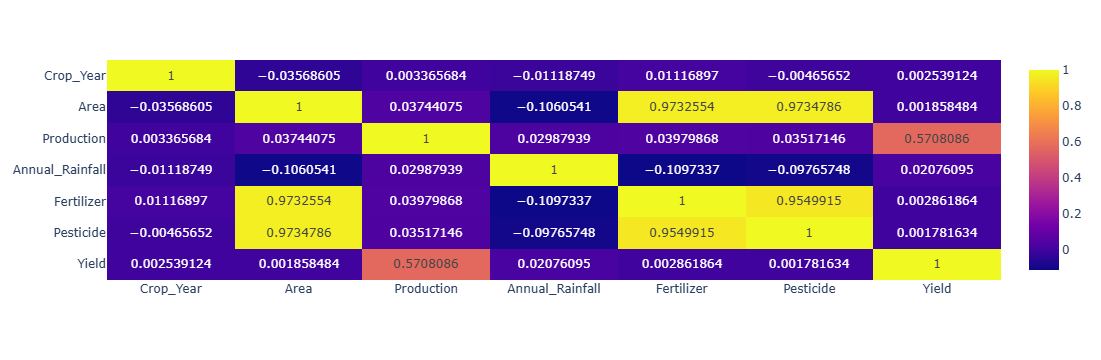

In [22]:
import plotly.express as px

fig = px.imshow(numerical_data.corr(),text_auto = True,aspect="auto")
fig.show()

### Observation :-

                   1.Crop Year:- It has almost No Correlation with any other variable.

                   2.Area And Fertilizer/Pesticide:- Area shows a Strong Positive Correlation with Fertilizer(0.97) and Pesticide(0.97).

                   3.Production And Yield:- Production has a Moderate Positive Correlation with Yield(0.57).
                                             Yield shows no significant correlation with other variables except Production.

                   4.Annual Rainfall:- Weak Correlation with most variables,indicating that rainfall variability might not directly 
                                        influence these factors significantly in the dataset.

                   5.Fertilizer And Pesticide:- A Very Strong Correlation(0.95),implying these two variables tend to move together,
                                                 possibly due to integrated farming practices.
                                                 

### Insights For Action :-

                          1).Strong Correlation(e.g, Area-Fertilizer And Area-Pesticide) could indicate a need to investigate 
                                                  cost-effectivenessecological impacts of input usage in large farming areas.

                          2).The Moderate Production-Yield Correlation suggest potential room for optimization to increase production 
                                                  further by addressing unstatistical model.

### checking for missing values :-


In [23]:
# checking for missing values

df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

## Count of unique Values in the columns  :-

In [24]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Garlic', 'Maize', 'Other Kharif pulses', 'other oilseeds', 'Peas & beans (Pulses)', 'Sweet potato', 'Rice', 'Safflower', 'Khesari', 'Sesamum', 'Sunflower', 'Oilseeds total', 'Moth', 'Other Cereals', 'Black pepper', 'Castor seed', 'Banana', 'Masoor', 'Cowpea(Lobia)', 'Moong(Green Gram)', 'Niger seed', 'Onion', 'Tapioca', 'Barley', 'Coconut ', 'Mesta', 'Cashewnut', 'Tobacco', 'Rapeseed &Mustard', 'Wheat', 'Dry chillies', 'Gram', 'Other Summer Pulses', 'Sannhamp', 'Arhar/Tur', 'Bajra', 'Ginger', 'Arecanut', 'Other  Rabi pulses', 'Groundnut', 'Linseed', 'Sugarcane', 'Turmeric', 'Jowar', 'Cardamom', 'Ragi', 'Cotton(lint)', 'Urad', 'Horse-gram', 'Jute', 'Guar seed', 'Soyabean', 'Small millets', 'Coriander', 'Potato'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

### COUNT DETAILS OF EACH CROP YEAR :-

In [25]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

#### Insufficient Recordes For Year 2020

### REMOVE RECORDS FOR YEAR 2020 :-

In [26]:
df = df[df['Crop_Year'] != 2020]

In [27]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

### COUNT DETAILS FOR EACH CROPS :- 

In [28]:
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small millets             484
Cotton(lint)              476
Onion                     453
Sunflower                 439
Dry chillies              419
Other Kharif pulses       381
Horse-gram                370
Peas & beans (Pulses)     368
Tobacco                   363
Other  Rabi pulses        354
Soyabean                  348
Turmeric                  336
Ginger                    323
Masoor                    323
Linseed                   308
Castor seed               300
Barley                    296
Sweet potato              273
Garli

### COUNT DETAILS FOR EACH SEASON :-

In [29]:
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

### COUNT DETAILS FOR EACH STATE :-

In [30]:
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

### CROP YIELD PER STATE :-

In [31]:
df_state_sort=df.groupby('State',as_index=False)['Yield'].sum().sort_values(by= 'Yield',ascending=False)
df_state_sort

State     Yield
29        West Bengal 291986.75
21         Puducherry 232163.60
0      Andhra Pradesh 229735.18
24         Tamil Nadu 185813.28
2               Assam 160612.65
12          Karnataka 151391.87
13             Kerala 147710.35
6                 Goa  87275.96
25          Telangana  39508.73
7             Gujarat   5471.63
27      Uttar Pradesh   4168.82
8             Haryana   3491.15
15        Maharashtra   3388.79
3               Bihar   3114.94
14     Madhya Pradesh   2921.85
28        Uttarakhand   2690.16
5               Delhi   2663.09
20             Odisha   2387.35
19           Nagaland   2344.35
16            Manipur   2316.35
22             Punjab   1926.57
26            Tripura   1891.46
17          Meghalaya   1868.33
4        Chhattisgarh   1799.56
9    Himachal Pradesh   1170.09
1   Arunachal Pradesh   1090.64
18            Mizoram   1068.81
11          Jharkhand    974.63
10  Jammu and Kashmir    825.38
23             Sikkim    278.63

### VISUALIZATION OF CROP YIELD PER STATE :-

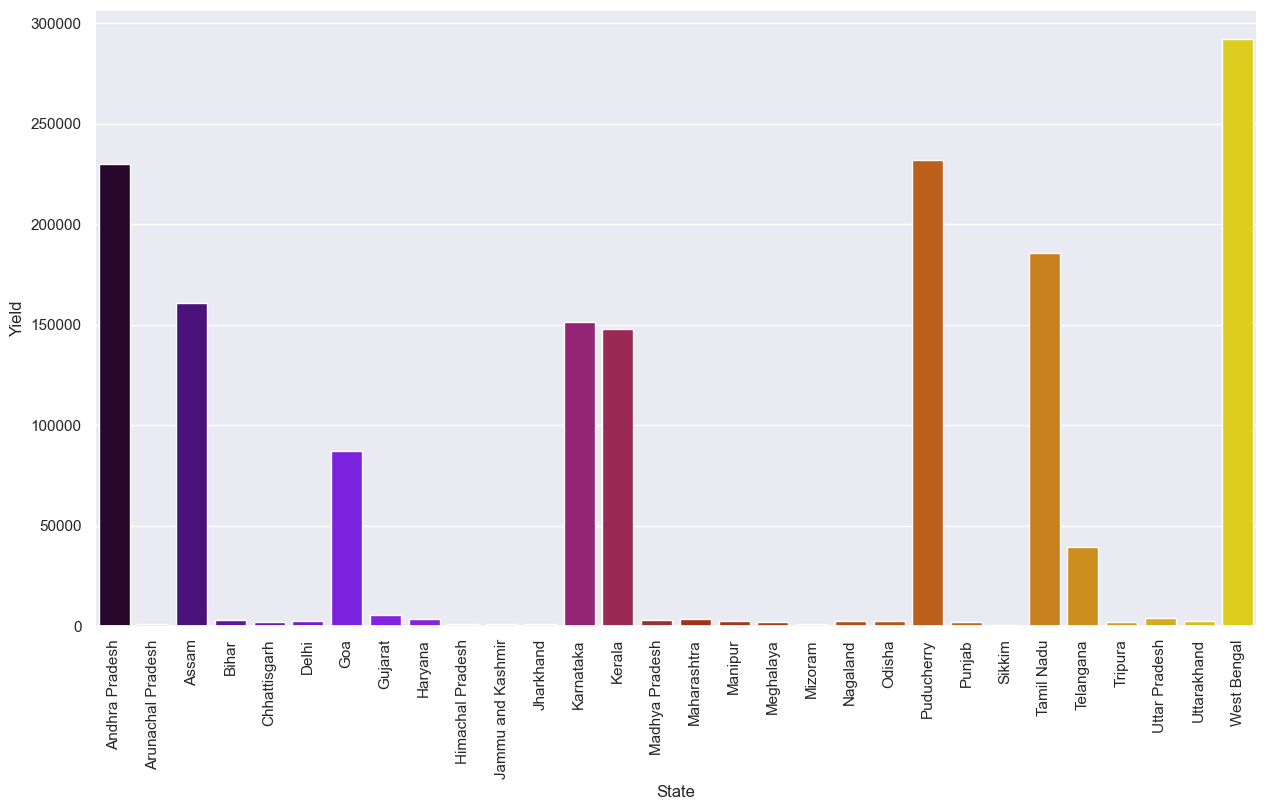

In [32]:
df_state=df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot') 
plt.xticks(rotation = 90)
plt.show()

## VISUALIZATION :-

<function matplotlib.pyplot.show(close=None, block=None)>

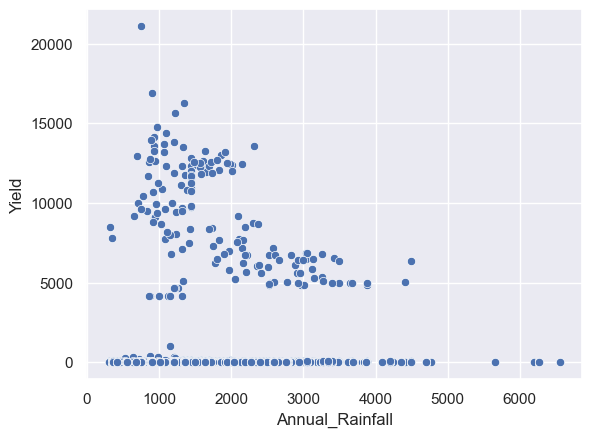

In [33]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

## YEAR WISE ANALYSIS OF AGRICULTURAL PRODUCTION :-

In [34]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [35]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

Crop  \
Crop_Year                                                      
1997       ArecanutArhar/TurCastor seedCoconut Cotton(lin...   
1998       ArecanutBajraBlack pepperCorianderCotton(lint)...   
1999       ArecanutArhar/TurBananaCastor seedCoconut Cott...   
2000       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2001       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2002       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2003       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2004       ArecanutArhar/TurBajraBajraBajraBananaBlack pe...   
2005       ArecanutArhar/TurBajraBajraBananaCashewnutCast...   
2006       ArecanutArecanutBananaBlack pepperCotton(lint)...   
2007       ArecanutBajraBananaBlack pepperCoconut Coriand...   
2008       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2009       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2010       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2011       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2012       ArecanutArhar/TurBajraBajraCashewnutCastor see...   
2013       ArecanutArhar/TurArhar/TurBajraBajraBananaBlac...   
2014       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2015       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2016       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2017       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2018       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2019       ArecanutArhar/TurArhar/TurBajraBajraBananaBlac...   

                                                      Season  \
Crop_Year                                                      
1997       Whole Year Kharif     Kharif     Whole Year Kh...   
1998       Kharif     Kharif     Kharif     Kharif     Su...   
1999       Whole Year Kharif     Whole Year Kharif     Wh...   
2000       Whole Year Kharif     Rabi       Kharif     Ra...   
2001       Whole Year Kharif     Rabi       Kharif     Ra...   
2002       Whole Year Kharif     Rabi       Kharif     Ra...   
2003       Whole Year Kharif     Rabi       Kharif     Ra...   
2004       Whole Year Kharif     Kharif     Rabi       Su...   
2005       Whole Year Kharif     Kharif     Rabi       Wh...   
2006       Kharif     Whole Year Kharif     Kharif     Su...   
2007       Kharif     Kharif     Kharif     Kharif     Wh...   
2008       Kharif     Kharif     Summer     Kharif     Kh...   
2009       Kharif     Kharif     Summer     Kharif     Kh...   
2010       Kharif     Kharif     Summer     Kharif     Kh...   
2011       Kharif     Kharif     Summer     Kharif     Kh...   
2012       Kharif     Kharif     Kharif     Rabi       Kh...   
2013       Kharif     Kharif     Rabi       Kharif     Ra...   
2014       Kharif     Kharif     Rabi       Kharif     Ra...   
2015       Kharif     Kharif     Rabi       Kharif     Ra...   
2016       Kharif     Kharif     Rabi       Kharif     Ra...   
2017       Kharif     Kharif     Rabi       Kharif     Ra...   
2018       Kharif     Kharif     Rabi       Kharif     Ra...   
2019       Kharif     Kharif     Rabi       Kharif     Ra...   

                                                       State         Area  \
Crop_Year                                                                   
1997       AssamAssamAssamAssamAssamAssamAssamAssamAssamA... 166068574.00   
1998       PuducherryPuducherryPuducherryPuducherryPuduch... 150123778.00   
1999       AssamAssamAssamAssamAssamAssamAssamAssamAssamA... 147057393.00   
2000       Andhra PradeshAndhra PradeshAndhra PradeshAndh... 147527729.00   
2001       Andhra PradeshAndhra PradeshAndhra PradeshAndh... 145694329.67   
2002       Andhra PradeshAndhra PradeshAndhra PradeshAndh... 142785766.81   
2003       Andhra PradeshAndhra PradeshAndhra PradeshAndh... 149696843.14   
2004       KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK... 148024472.96   
2005       Andhra PradeshAndhra PradeshAndhra PradeshAndh... 147918314.26   
2006   

###  VISUALIZATION OF YIELD OVER THE YEAR :-

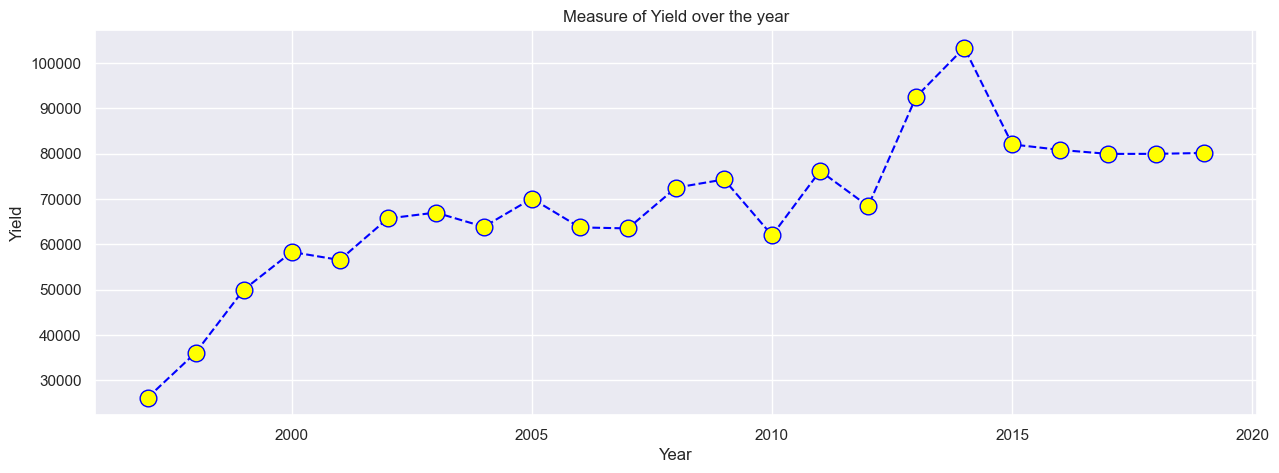

In [36]:
plt.figure(figsize = (15,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

### It can be observed that the yield has increased over the year, but after 2014 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility.

### VISUALIZATION OF AREA UNDER CULTIVATION OVER THE YEAR :-

In [37]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

### It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture.

### VISUALIZATION OF USE OF FERTILIER OVER THE YEAR :-

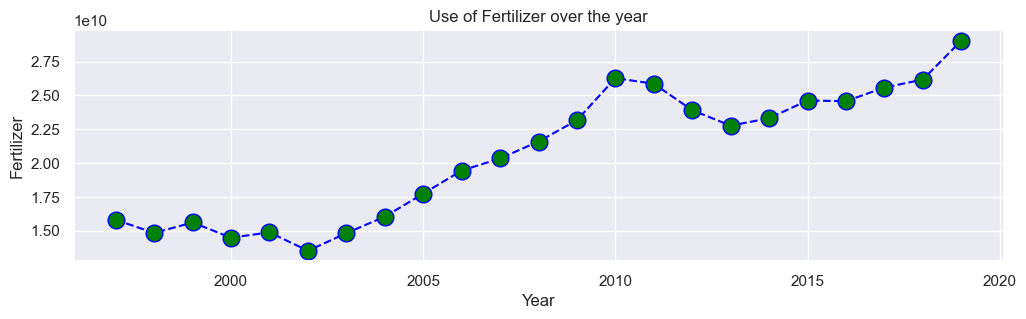

In [38]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

### The use of Fertilizer in the fields is increasing.

### VISUALIZATION OF USE OF PESTICIDE OVER THE YEAR :-

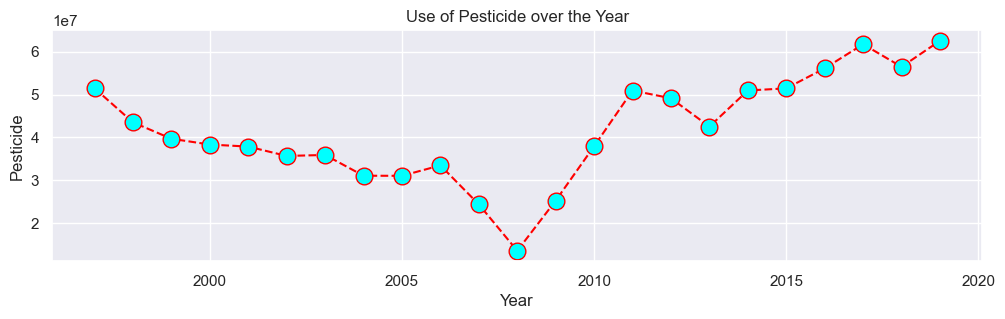

In [39]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

## STATE WISE ANALYSIS OF AGRICULTURAL PRODUCTION :-

In [40]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

Crop  \
State                                                                  
West Bengal        ArecanutArhar/TurBajraBarleyCardamomCastor see...   
Puducherry         ArecanutBajraBlack pepperCorianderCotton(lint)...   
Andhra Pradesh     ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
Tamil Nadu         ArecanutArhar/TurBajraBananaCashewnutCastor se...   
Assam              ArecanutArhar/TurCastor seedCoconut Cotton(lin...   
Karnataka          ArecanutArhar/TurBajraBajraBlack pepperCardamo...   
Kerala             ArecanutBlack pepperCashewnutCoconut TapiocaAr...   
Goa                ArecanutBananaBlack pepperCashewnutCoconut Gro...   
Telangana          Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...   
Gujarat            Arhar/TurBajraBajraBananaCastor seedCastor see...   
Uttar Pradesh      Arhar/TurBajraBarleyCastor seedGramGroundnutJo...   
Haryana            Arhar/TurBajraBarleyCotton(lint)Dry chilliesGr...   
Maharashtra        Arhar/TurBajraCotton(lint)GramJowarJowarMaizeM...   
Bihar              Arhar/TurBajraBananaBarleyCastor seedCoriander...   
Madhya Pradesh     Arhar/TurBajraBarleyCotton(lint)GroundnutJowar...   
Uttarakhand        Arhar/TurBajraBarleyGarlicGramGroundnutHorse-g...   
Delhi              Arhar/TurBajraBarleyGramJowarMaizeOther Kharif...   
Odisha             Arhar/TurArhar/TurArhar/TurGroundnutGroundnutG...   
Nagaland           Arhar/TurBajraCastor seedCotton(lint)GramGroun...   
Manipur            Arhar/TurBananaCashewnutDry chilliesGingerMaiz...   
Punjab             Arhar/TurBajraBarleyCotton(lint)GramGroundnutM...   
Tripura            Arhar/TurCotton(lint)GramGroundnutGroundnutJut...   
Meghalaya          ArecanutArhar/TurBananaCastor seedCotton(lint)...   
Chhattisgarh       Arhar/TurBajraBajraBarleyCastor seedCorianderC...   
Himachal Pradesh   Arhar/TurBajraBarleyCorianderCotton(lint)Dry c...   
Arunachal Pradesh  Arhar/TurDry chilliesGingerGroundnutMaizeMasoo...   
Mizoram            Arhar/TurCoconut GroundnutMaizeMaizePeas & bea...   
Jharkhand          Arhar/TurGramMaizeMasoorPotatoPotatoRagiRapese...   
Jammu and Kashmir  Arhar/TurBarleyGarlicGramLinseedMasoorOnionOth...   
Sikkim             BarleyMaizeMaizeOther  Rabi pulsesRapeseed &Mu...   

                   Crop_Year  \
State                          
West Bengal          2196856   
Puducherry           1346899   
Andhra Pradesh       2543550   
Tamil Nadu           1652030   
Assam                1468138   
Karnataka            2876568   
Kerala               1072892   
Goa                   494067   
Telangana             800319   
Gujarat              1641081   
Uttar Pradesh        1657261   
Haryana              1267508   
Maharashtra          1546539   
Bihar                1799058   
Madhya Pradesh       1697425   
Uttarakhand          1460872   
Delhi                 407560   
Odisha               1525934   
Nagaland             1384791   
Manipur               891535   
Punjab                797278   
Tripura               886679   
Meghalaya            1303721   
Chhattisgarh         1838861   
Himachal Pradesh     1237740   
Arunachal Pradesh     586807   
Mizoram               835617   
Jharkhand             543138   
Jammu and Kashmir    1268456   
Sikkim                453793   

                                                              Season  \
State                                                                  
West Bengal        Whole Year Whole Year Kharif     Whole Year Wh...   
Puducherry         Kharif     Kharif     Kharif     Kharif     Su...   
Andhra Pradesh     Whole Year Kharif     Rabi       Kharif     Ra...   
Tamil Nadu         Whole Year Kharif     Kharif     Whole Year Wh...   
Assam              Whole Year Kharif     Kharif     Whole Year Kh...   
Karnataka          Whole Year Kharif     Kharif     Summer     Kh...   
Kerala             Whole Year Whole Year Whole Year Whole Year Wh...   
Goa                Whole Year Whole Year Whole Year Whole Year Wh...   
Telangana     

### VISUALIZATION OF STATE WISE :-

In [41]:
import plotly.express as px

df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

### From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers.

### ANNUAL RAINFALL PER STATE :-

In [42]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall',ascending=False)
df_state_sort

State  Annual_Rainfall
17          Meghalaya       2623959.14
29        West Bengal       1883455.70
12          Karnataka       1692392.73
13             Kerala       1536641.30
2               Assam       1531493.36
0      Andhra Pradesh       1160139.90
4        Chhattisgarh       1159347.20
20             Odisha       1098412.40
19           Nagaland       1064884.45
3               Bihar       1042239.50
28        Uttarakhand       1038481.20
26            Tripura       1015519.79
18            Mizoram       1013275.26
21         Puducherry        959916.00
15        Maharashtra        905670.75
14     Madhya Pradesh        847829.30
6                 Goa        824746.06
24         Tamil Nadu        765414.20
1   Arunachal Pradesh        762047.00
10  Jammu and Kashmir        752008.20
9    Himachal Pradesh        706851.50
16            Manipur        686844.06
7             Gujarat        641179.90
27      Uttar Pradesh        625575.60
23             Sikkim        580895.78
25          Telangana        395509.50
11          Jharkhand        319456.50
8             Haryana        294622.15
22             Punjab        202057.80
5               Delhi        128479.36

### VISUALIZATION OF ANNUAL RAIFALL PER STATE :-

In [43]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 90)
plt.show()

### Observations:
              Annual Rainfall is highest in Chattisgarh but the yield is not the highest.

              West Bengal has the maximum yield.

              Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall.

## SEASON WISE ANALYSIS :-

In [44]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

Crop  Crop_Year  \
Season                                                                      
Autumn       RiceRagiRiceRiceRiceRiceRiceRiceDry chilliesRi...     832058   
Kharif       Arhar/TurCastor seedCotton(lint)JuteMaizeMesta...   16504625   
Rabi         GramLinseedOther  Rabi pulsesRapeseed &Mustard...   11519394   
Summer       RiceBajraJowarMaizeRagiRiceMoong(Green Gram)Ri...    2392424   
Winter       RiceRiceRiceRiceRiceRiceRicePotatoRiceSesamumR...     781718   

                                                         State          Area  \
Season                                                                         
Autumn       AssamWest BengalWest BengalAssamKeralaWest Ben...   58626370.49   
Kharif       AssamAssamAssamAssamAssamAssamAssamAssamKarnat... 1702290574.26   
Rabi         AssamAssamAssamAssamAssamKarnatakaKarnatakaKar... 1172237717.01   
Summer       AssamKarnatakaKarnatakaKarnatakaKarnatakaKarna...   98775535.92   
Winter       AssamWest BengalAssamKeralaWest BengalAssamKer...  280684654.63   

             Production  Annual_Rainfall      Fertilizer    Pesticide    Yield  
Season                                                                          
Autumn         84406651        703175.88   7696199884.57  15528287.11  1621.84  
Kharif       5401475053      11296012.69 228184867366.15 462323158.50 20404.31  
Rabi         2836320092       7957618.01 156366636562.06 321706957.61 11397.53  
Summer        243675593       1559330.66  13716010587.81  27315347.73  3573.52  
Winter        586507936        670991.04  38118571954.15  75902703.42  2056.75

### VISUALIZATION OF SEASON WISE / AREA:-

In [45]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

### VISUALIZATION OF SEASON WISE/YIELD :-

In [46]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])                
fig.show()

### Observations:

                 Area under cultivation in Kharif season is highest, second is Rabi season.

                 Crops in autumn, summer are not grown over large area.

                 Yield in India is maximum in Kharif season.

## CROP WISE ANALYSIS :-

In [47]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [48]:
df_yz.head()

Crop  Crop_Year       Season           State     Area  \
92          Cardamom       1997  Whole Year      West Bengal  2674.00   
125        Sunflower       1997  Whole Year      West Bengal   278.00   
1058        Soyabean       2002  Kharif       Andhra Pradesh 41284.00   
1134  other oilseeds       2002  Whole Year           Kerala  2253.00   
1135        Arecanut       2002  Whole Year       Tamil Nadu  4956.00   

      Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
92             7          1852.90   254484.58     828.94   0.00  
125            1          1852.90    26457.26      86.18   0.00  
1058           0           648.10  3908356.28   10321.00   0.00  
1134           0          2511.20   213291.51     563.25   0.00  
1135           0           315.90   469184.52    1239.00   0.00

### VISUALIZATION OF STATES AND THE CROPS WHERE YIELD IS ZERO :-

In [91]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=90)
plt.title('States and the Crops where yield is zero')
plt.show()

<Figure size 2500x1500 with 0 Axes>

### VISUALIZATION OF WHERE YIELD IS MORE THAN ZERO :-

In [50]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

Crop_Year  \
Crop                               
Arecanut                  321347   
Arhar/Tur                1018521   
Bajra                    1052589   
Banana                    488061   
Barley                    594537   
Black pepper              253163   
Cardamom                  146569   
Cashewnut                 265313   
Castor seed               602681   
Coconut                   331429   
Coriander                 397906   
Cotton(lint)              950038   
Cowpea(Lobia)             263939   
Dry chillies              841584   
Garlic                    496276   
Ginger                    644944   
Gram                      980215   
Groundnut                1454622   
Guar seed                 122657   
Horse-gram                731534   
Jowar                    1030385   
Jute                      333372   
Khesari                   150678   
Linseed                   614576   
Maize                    1952758   
Masoor                    649121   
Mesta                     415840   
Moong(Green Gram)        1470904   
Moth                      214966   
Niger seed                381651   
Oilseeds total             58267   
Onion                     896263   
Other  Rabi pulses        709265   
Other Cereals             289592   
Other Kharif pulses       759471   
Other Summer Pulses        20174   
Peas & beans (Pulses)     739568   
Potato                   1255941   
Ragi                      998519   
Rapeseed &Mustard        1058570   
Rice                     2400561   
Safflower                 337522   
Sannhamp                  307237   
Sesamum                  1372313   
Small millets             970378   
Soyabean                  691289   
Sugarcane                1212992   
Sunflower                 879951   
Sweet potato              538489   
Tapioca                   401856   
Tobacco                   725349   
Turmeric                  668970   
Urad                     1463017   
Wheat                    1088664   
other oilseeds            241368   

                                                                  Season  \
Crop                                                                       
Arecanut               Whole Year Whole Year Whole Year Whole Year Wh...   
Arhar/Tur              Kharif     Kharif     Kharif     Whole Year Kh...   
Bajra                  Kharif     Summer     Kharif     Kharif     Kh...   
Banana                 Whole Year Whole Year Whole Year Whole Year Wh...   
Barley                 Whole Year Rabi       Rabi       Rabi       Ra...   
Black pepper           Kharif     Whole Year Kharif     Whole Year Wh...   
Cardamom               Whole Year Whole Year Whole Year Whole Year Wh...   
Cashewnut              Whole Year Whole Year Whole Year Whole Year Wh...   
Castor seed            Kharif     Rabi       Whole Year Kharif     Kh...   
Coconut                Whole Year Whole Year Whole Year Whole Year Wh...   
Coriander              Whole Year Kharif     Whole Year Whole Year Wh...   
Cotton(lint)           Kharif     Kharif     Kharif     Summer     Kh...   
Cowpea(Lobia)          Kharif     Rabi       Kharif     Rabi       Kh...   
Dry chillies           Whole Year Kharif     Rabi       Whole Year Wh...   
Garlic                 Whole Year Whole Year Whole Year Whole Year Wh...   
Ginger                 Kharif     Kharif     Kharif     Whole Year Kh...   
Gram                   Rabi       Rabi       Rabi       Rabi       Ra...   
Groundnut              Kharif     Rabi       Whole Year Rabi       Kh...   
Guar seed              Rabi       Whole Year Whole Year Whole Year Wh...   
Horse-gram             Kharif     Rabi       Kharif     Kharif     Ra...   
Jowar                  Kharif     Rabi       Summer     Whole Year Kh...   
Jute                   Kharif     Kharif     Kharif     Kharif     Kh...   
Khesari                Rabi       Rabi       Rabi       Rabi       Ra...   
Linseed                Rabi       Kharif     Whole Year Rabi       Ra.

### VISUALIZATION OF USE OF FERTILIZER IN DIFFERENT CROPS :-

In [92]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=90)
plt.show()

### The amount of Fertilizer used is maximum in Rice Crop.

### The second crop to use more fertilizer is Wheat crop.

### VISULIZATION OF AREA UNDER CULTIVATION :-

In [93]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=90)
plt.show()

### Area under cultivation is larger for Rice and Wheat crops.

## ANALYSIS OF WHEAT CROP :-

In [53]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

Crop  Crop_Year       Season              State        Area  Production  \
0    Wheat       1997  Rabi                     Assam    84698.00      110054   
1    Wheat       1997  Rabi                 Karnataka   250698.00      118512   
2    Wheat       1997  Rabi                 Meghalaya     4287.00        6894   
3    Wheat       1997  Rabi               West Bengal   367374.00      810480   
4    Wheat       1998  Rabi                     Assam    89591.00       90509   
5    Wheat       1998  Rabi                 Karnataka   268981.00      219433   
6    Wheat       1998  Rabi                 Meghalaya     4287.00        6998   
7    Wheat       1998  Rabi               West Bengal   367472.00      778090   
8    Wheat       1999  Rabi                     Assam    76310.00       97583   
9    Wheat       1999  Rabi               West Bengal   364155.00      850778   
10   Wheat       2000  Rabi            Andhra Pradesh    14261.00        8121   
11   Wheat       2000  Rabi                     Assam    70301.00       85695   
12   Wheat       2000  Rabi                 Karnataka   266310.00      249880   
13   Wheat       2000  Rabi                 Meghalaya     4215.00        6892   
14   Wheat       2000  Rabi               West Bengal   426000.00     1057610   
15   Wheat       2001  Rabi            Andhra Pradesh    13793.00        9486   
16   Wheat       2001  Rabi                     Assam    72245.00       85300   
17   Wheat       2001  Rabi                 Karnataka   260486.00      198822   
18   Wheat       2001  Rabi                 Meghalaya     2753.00        4812   
19   Wheat       2001  Rabi               West Bengal   434004.00      961533   
20   Wheat       2002  Rabi            Andhra Pradesh    11044.00       14898   
21   Wheat       2002  Rabi                     Assam    69061.00       77952   
22   Wheat       2002  Rabi               West Bengal   405350.00      887437   
23   Wheat       2003  Rabi            Andhra Pradesh    11928.00        6741   
24   Wheat       2003  Rabi                     Assam    69954.00       73186   
25   Wheat       2003  Rabi                 Karnataka   231994.00       96150   
26   Wheat       2003  Rabi                 Meghalaya      862.00        1540   
27   Wheat       2003  Rabi               West Bengal   425721.00      985686   
28   Wheat       2004  Rabi                 Karnataka   241991.00      206296   
29   Wheat       2004  Rabi                 Meghalaya      863.00        1564   
30   Wheat       2005  Rabi            Andhra Pradesh    11109.00        8891   
31   Wheat       2005  Rabi                     Assam    49961.00       53735   
32   Wheat       2005  Rabi                 Karnataka   252588.00      226369   
33   Wheat       2005  Rabi                 Meghalaya      670.00        1198   
34   Wheat       2005  Rabi               West Bengal   366729.00      773514   
35   Wheat       2006  Rabi                 Meghalaya      656.00        1183   
36   Wheat       2006  Rabi            Andhra Pradesh    10016.00        8796   
37   Wheat       2006  Rabi                     Assam    59573.00       67413   
38   Wheat       2006  Rabi                 Karnataka   269494.00      223806   
39   Wheat       2006  Rabi               West Bengal   350621.00      799876   
40   Wheat       2007  Rabi                     Assam    56069.00       70797   
41   Wheat       2007  Rabi                 Karnataka   275583.00      280384   
42   Wheat       2007  Rabi               West Bengal   352579.00      917284   
43   Wheat       2008  Rabi            Andhra Pradesh    13687.00       15421   
44   Wheat       2008  Rabi                     Assam    50053.00       54551   
45   Wheat       2008  Rabi                 Karnataka   268600.00      257181   
46   Wheat       2008  Rabi                 Meghalaya      416.00         739   
47   Wheat       2008  Rabi               West Bengal   306985.00      764528   
48   Wheat       2009  Rabi          

In [54]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
df_wheat_year

Crop  \
Crop_Year                                                      
1997       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
1998       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
1999       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2000       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2001       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2002       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2003       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2004       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2005       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2006       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2007       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2008       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2009       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2010       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2011       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2012       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2013       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2014       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2015       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2016       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2017       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2018       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   
2019       WheatWheatWheatWheatWheatWheatWheatWheatWheatW...   

                                                      Season  \
Crop_Year                                                      
1997       Rabi       Rabi       Rabi       Rabi       Ra...   
1998       Rabi       Rabi       Rabi       Rabi       Ra...   
1999       Rabi       Rabi       Rabi       Rabi       Ra...   
2000       Rabi       Rabi       Rabi       Rabi       Ra...   
2001       Rabi       Rabi       Rabi       Rabi       Ra...   
2002       Rabi       Rabi       Rabi       Rabi       Ra...   
2003       Rabi       Rabi       Rabi       Rabi       Ra...   
2004       Rabi       Rabi       Rabi       Rabi       Ra...   
2005       Rabi       Rabi       Rabi       Rabi       Ra...   
2006       Rabi       Rabi       Rabi       Rabi       Ra...   
2007       Rabi       Rabi       Rabi       Rabi       Ra...   
2008       Rabi       Rabi       Rabi       Rabi       Ra...   
2009       Rabi       Rabi       Rabi       Rabi       Ra...   
2010       Rabi       Rabi       Rabi       Rabi       Ra...   
2011       Rabi       Rabi       Rabi       Rabi       Ra...   
2012       Rabi       Rabi       Rabi       Whole Year Ra...   
2013       Rabi       Rabi       Rabi       Rabi       Ra...   
2014       Rabi       Rabi       Rabi       Whole Year Ra...   
2015       Rabi       Rabi       Rabi       Rabi       Wh...   
2016       Rabi       Rabi       Rabi       Rabi       Wh...   
2017       Kharif     Rabi       Rabi       Rabi       Ra...   
2018       Rabi       Rabi       Rabi       Rabi       Wh...   
2019       Rabi       Rabi       Rabi       Rabi       Wh...   

                                                       State        Area  \
Crop_Year                                                                  
1997       AssamKarnatakaMeghalayaWest BengalOdishaAndhra... 23500898.00   
1998       AssamKarnatakaMeghalayaWest BengalAndhra Prade... 24431921.00   
1999       AssamWest BengalBiharGujaratHaryanaHimachal Pr... 24503856.00   
2000       Andhra PradeshAssamKarnatakaMeghalayaWest Beng... 23338921.00   
2001       Andhra PradeshAssamKarnatakaMeghalayaWest Beng... 24027129.00   
2002       Andhra PradeshAssamWest BengalBiharChhattisgar... 23410674.69   
2003       Andhra PradeshAssamKarnatakaMeghalayaWest Beng... 24734430.70   
2004       KarnatakaMeghalayaAndhra PradeshAssamBiharChha... 24789592.58   
2005       Andhra PradeshAssamKarnatakaMeghalayaWest Beng... 24101857.23   
2006       Meghala

### VISUALIZATION OF YIELD OF WHEAT CROP OVER THE YEARS :-

In [55]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

## MODELLING :-

In [56]:
df1 = df.copy()

In [57]:
df1.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

## PLOT DISTRIBUTION :-

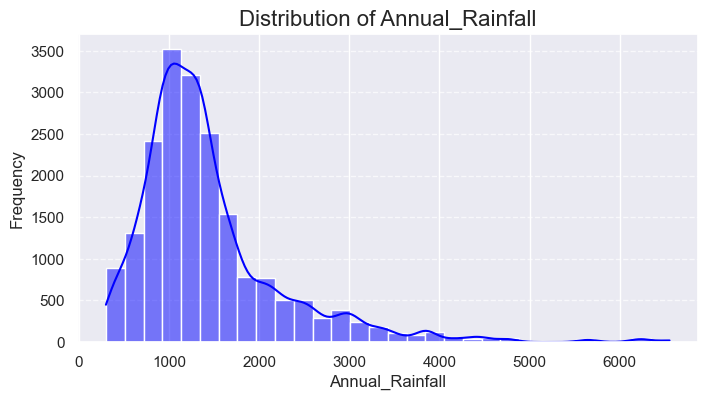

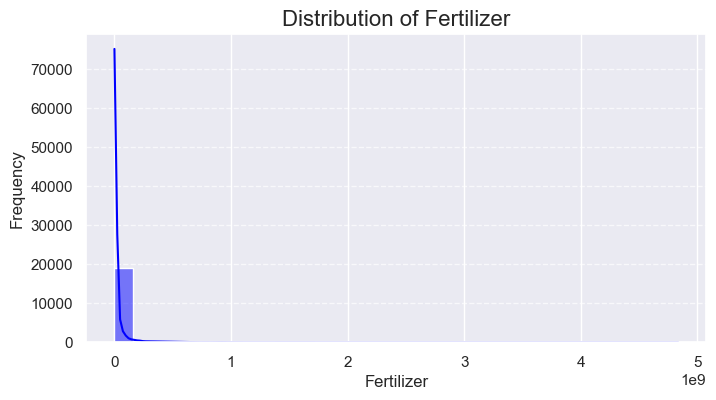

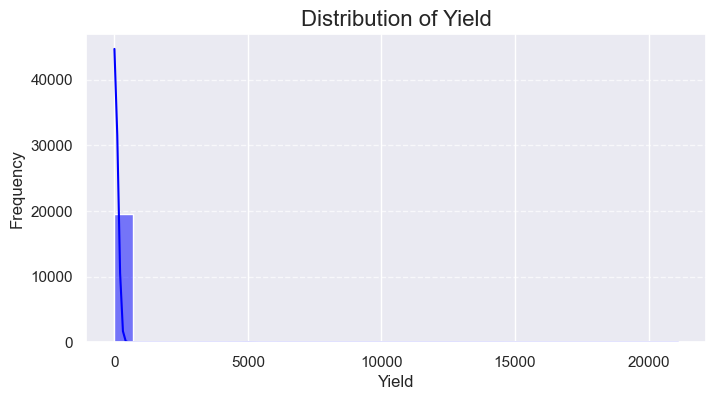

In [58]:
filtered_data = [col for col in numerical_data if col != 'Crop_Year']

for col in filtered_data:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue') #Create a histogram with KDE overlay
    plt.title(f'Distribution of {col}', fontsize=16) # Set the title dynamically
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y' ,linestyle='--',alpha=0.7)
    plt.show()

### CHECKING SKEWNESS :-

In [59]:
df1.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

#### CHECK SKEWNESS FOR EACH COLUMNS :-

In [60]:
# Check Skewness for each columns
skewness=df1[['Area','Production','Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

Annual_Rainfall    2.13
Fertilizer        13.40
Production        19.28
Area              21.84
Pesticide         25.61
dtype: float64


Crop_Year
-0.1626432290882246


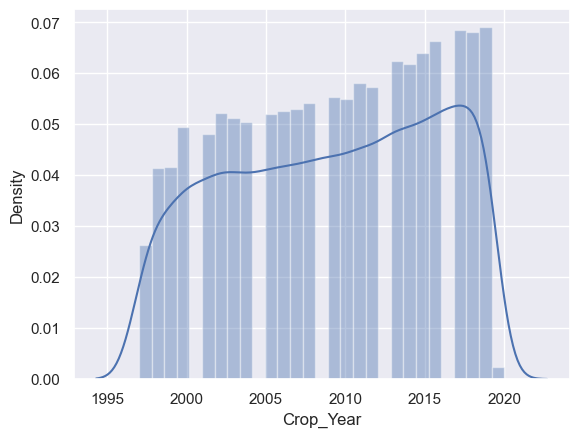


Area
21.85655250096762


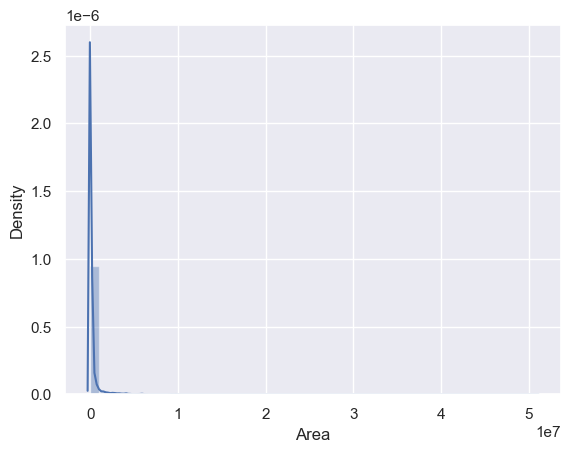


Production
19.297723077777405


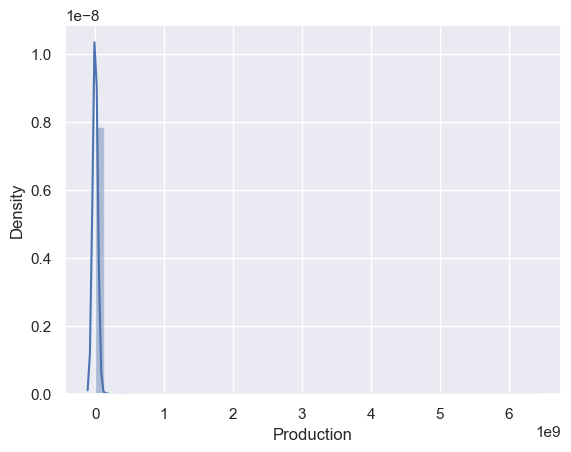


Annual_Rainfall
2.131622598686226


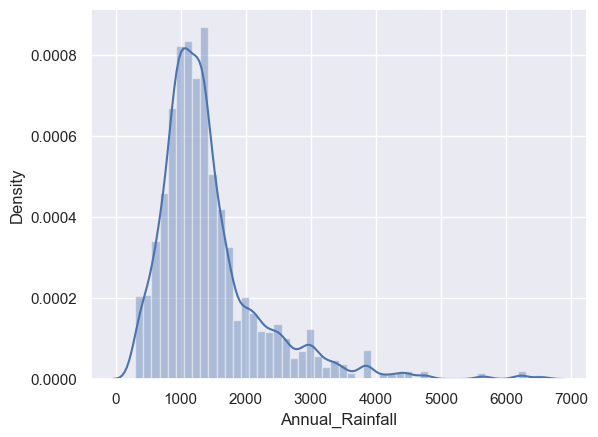


Fertilizer
13.411576953964282


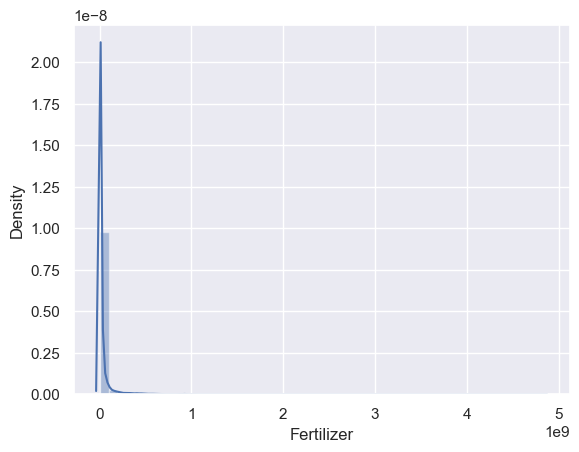


Pesticide
25.6337929946129


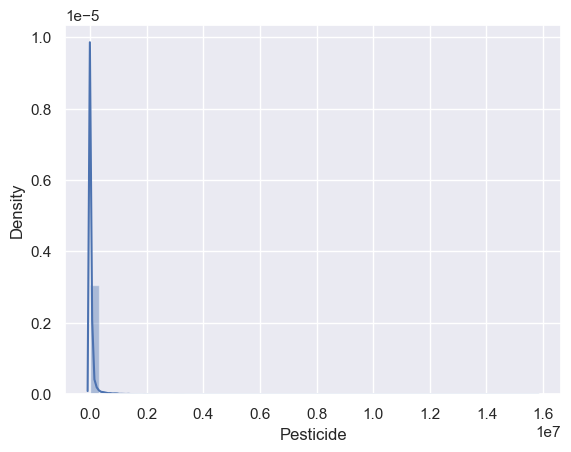


Yield
12.784290623822944


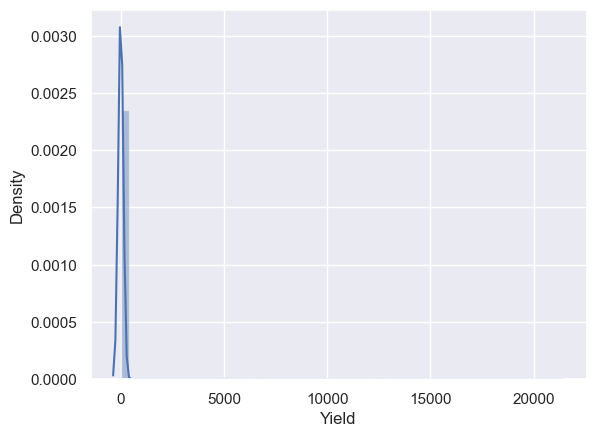

In [61]:
from scipy.stats import skew
for col in numerical_data.columns:
  print()
  print(col)
  print(skew(numerical_data[col]))
  plt.figure()
  sns.distplot(numerical_data[col])
  plt.show()

## ONE-HOT ENCODING :-

In [62]:
categorical_data = df1.select_dtypes(include = ['object']).columns
categorical_data

Index(['Crop', 'Season', 'State'], dtype='object')

In [63]:
df1 = pd.get_dummies(df1, columns = categorical_data, drop_first=True)

In [64]:
df1.shape

(19652, 95)

## SQRT TRANSFORMATION TO REDUCE THE SKEWNESS :-

### SQRT Transformation Using For Fertilizer :-

In [65]:
df1['Fertilizer']=np.sqrt(df1['Fertilizer'])

3.534442713888896


<Axes: xlabel='Fertilizer', ylabel='Density'>

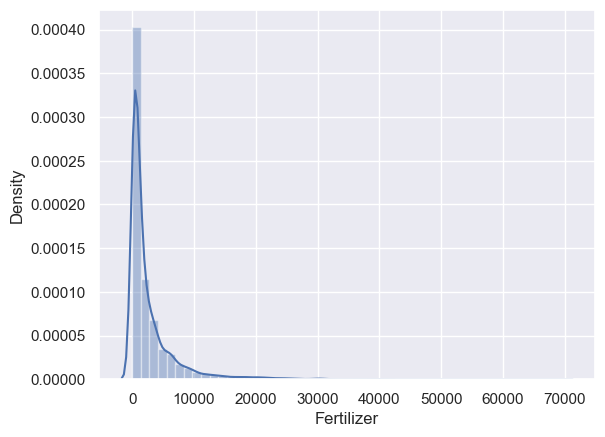

In [66]:
print(skew(df1['Fertilizer']))
sns.distplot(df1['Fertilizer'])

### SQRT Transformation Using For Production :-

In [67]:
df1['Production']=np.sqrt(df1['Production'])

In [68]:
print(skew(df1['Production']))
sns.distplot(df1['Production'])

15.31894351136251


<Axes: xlabel='Production', ylabel='Density'>

### SQRT Transformation Using For Area :-

In [69]:
df1['Area']=np.sqrt(df1['Area'])

In [70]:
print(skew(df1['Area']))
sns.distplot(df1['Area'])

3.5531545043428348


<Axes: xlabel='Area', ylabel='Density'>

### SQRT Transformation Using For Pesticide :-

In [71]:
df1['Pesticide']=np.sqrt(df1['Pesticide'])

In [72]:
print(skew(df1['Pesticide']))
sns.distplot(df1['Pesticide'])

3.7799711904954583


<Axes: xlabel='Pesticide', ylabel='Density'>

### Here we can see skew score decreases and correlation between dependent and independent feature increases.

## OUTLIER DETECTION:-

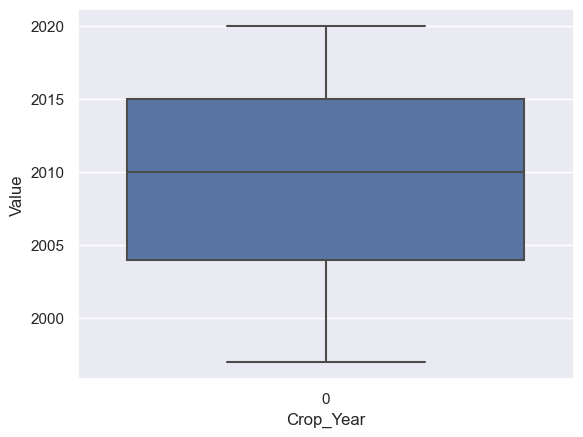

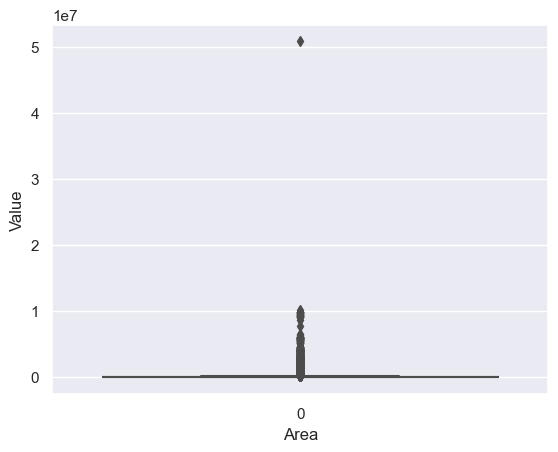

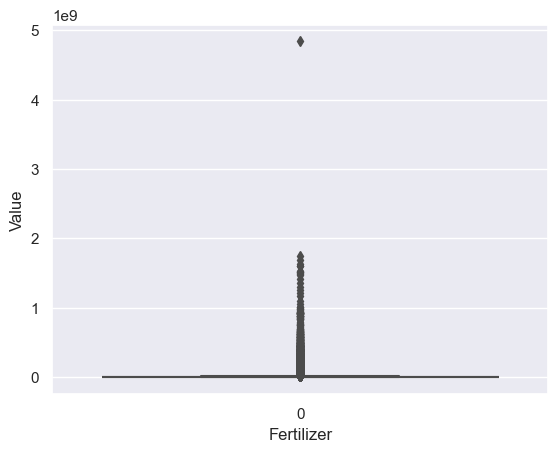

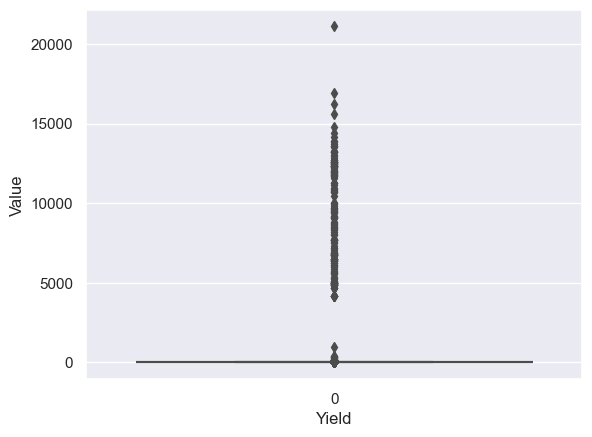

In [73]:
for o in numerical_data.columns:
    sns.boxplot(numerical_data[o])
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

## OUTLIER TREATMENT :-

In [74]:
for z in numerical_data.columns:
    q1=np.percentile(numerical_data[z],25)
    q3=np.percentile(numerical_data[z],75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    numerical_data[z]=np.where(numerical_data[z]>uf,uf,
                  np.where(numerical_data[z]<lf,lf,numerical_data[z]))

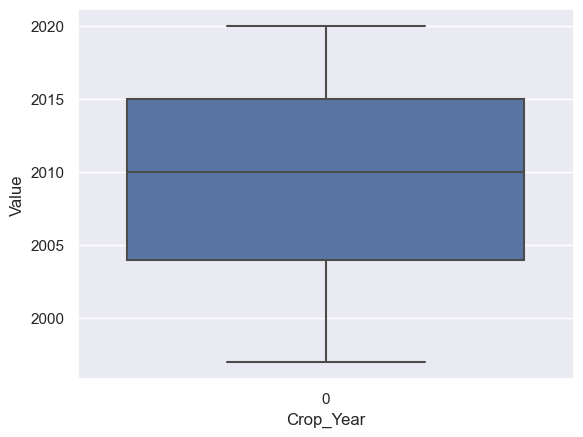

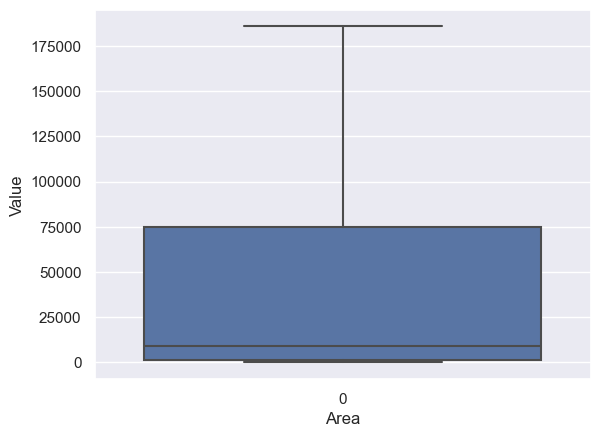

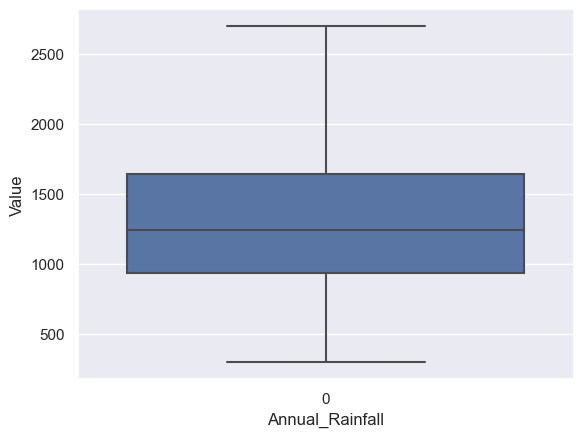

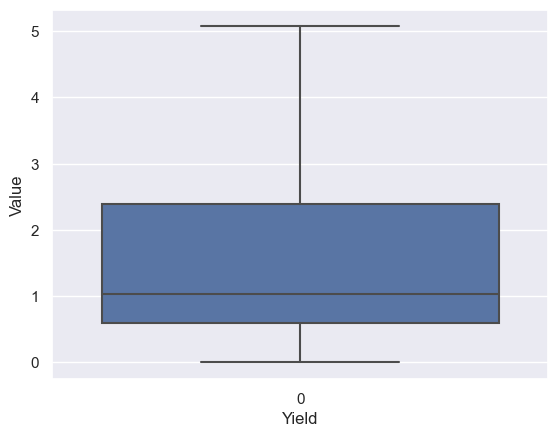

In [75]:
for x in numerical_data.columns:
    sns.boxplot(numerical_data[x])
    plt.xlabel(x)
    plt.ylabel('Value')
    plt.show()

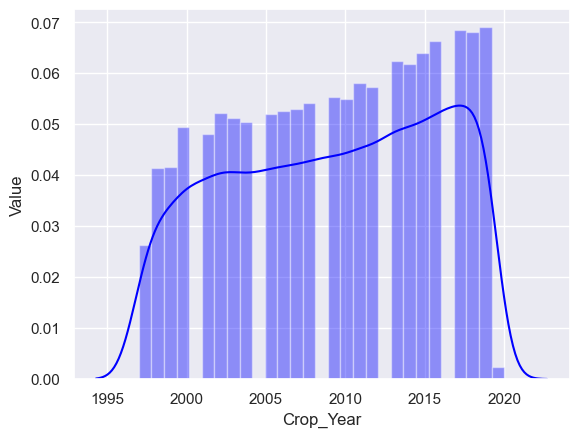

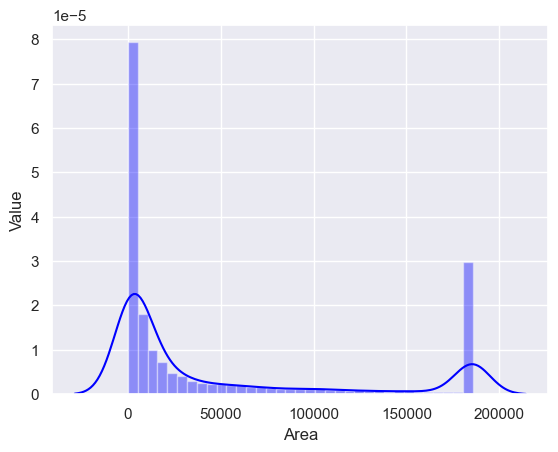

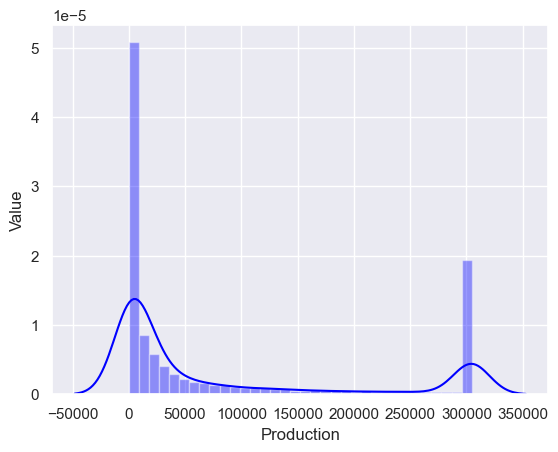

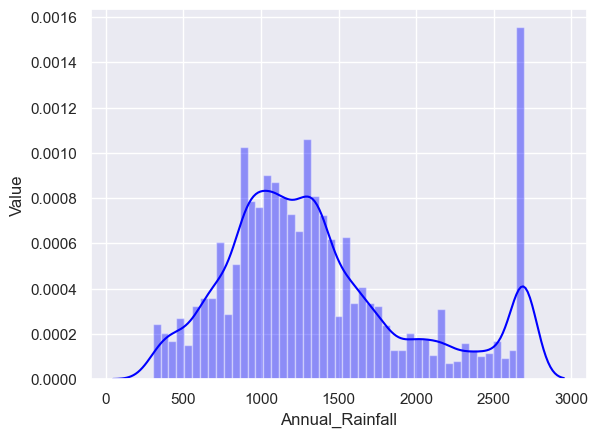

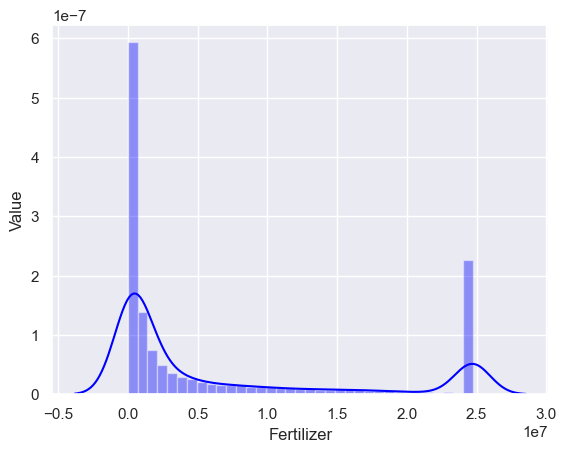

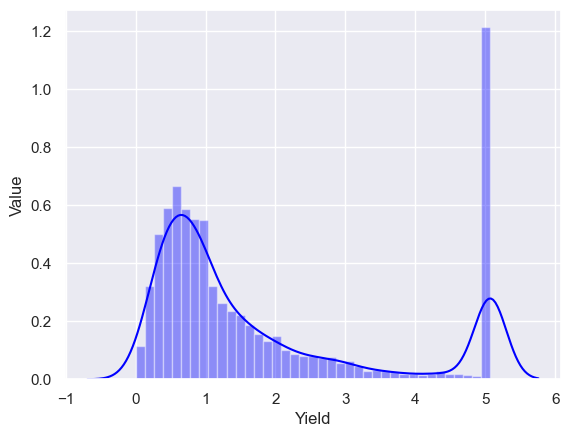

In [76]:
for d1 in numerical_data.columns:
    sns.distplot(numerical_data[d1],color='blue')
    plt.xlabel(d1)
    plt.ylabel('Value')
    plt.show()

## SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES :-

In [77]:
from sklearn.model_selection import train_test_split

x = df1.drop(['Yield'], axis = 1)
y = df1['Yield']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
print("x_train - >  ", x_train.shape)
print("y_train - >  ", y_train.shape)
print("x_test - >  ", x_test.shape)
print("y_test - >  ", y_test.shape)

x_train - >   (15721, 94)
y_train - >   (15721,)
x_test - >   (3931, 94)
y_test - >   (3931,)


## COMPARE BETWEEN MODELS :-

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor



models = {     
    "LR": LinearRegression(),
    
    "Ridge": Ridge(),
    
    "Lasso": Lasso(),
    
    "ElasticNet": ElasticNet(),
    
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    
    "DT": DecisionTreeRegressor(),

    "Ada Boost": AdaBoostRegressor(),
    
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),

    "XGB": XGBRegressor(),
    
    "KNN": KNeighborsRegressor(),
    
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')



    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Training Model LR 
-----------------------------------------------
Score is 0.816106727120185
Training R-squared: 0.8485630263268431
Testing R-squared: 0.816106727120185
Mean Squared Error: 127045.29671662471
Mean Absolute Error: 62.52610922281922
Training Model Ridge 
-----------------------------------------------
Score is 0.8179063091993668
Training R-squared: 0.848427209880993
Testing R-squared: 0.8179063091993668
Mean Squared Error: 125802.02970834759
Mean Absolute Error: 62.48142457689855
Training Model Lasso 
-----------------------------------------------
Score is 0.8183543893056503
Training R-squared: 0.8472713855472702
Testing R-squared: 0.8183543893056503
Mean Squared Error: 125492.46716065827
Mean Absolute Error: 50.67022789888741
Training Model ElasticNet 
-----------------------------------------------
Score is 0.575208414307419
Training R-squared: 0.4993450812214527
Testing R-squared: 0.575208414307419
Mean Squared Error: 293473.34027988376
Mean Absolute Error: 88.337003

  File "C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


Score is 0.9723675064770538
Training R-squared: 0.9801104547911121
Testing R-squared: 0.9723675064770538
Mean Squared Error: 19090.30321591631
Mean Absolute Error: 7.361305848203458
Training Model SVR 
-----------------------------------------------
Score is 0.0065275515007107154
Training R-squared: 0.00570787619635138
Testing R-squared: 0.0065275515007107154
Mean Squared Error: 686354.6448589959
Mean Absolute Error: 67.75449049414743


### The Best Algorithm Is Random Forest.

## RANDOM FOREST:-

### NOW WE GO TO CHOOSE MAX DEPTH :-

In [80]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test)
    train_accuracy_values.append(acc_train)

In [81]:
train_accuracy_values

[0.8143878015050651,
 0.8918881148934296,
 0.939427016524484,
 0.9617186313263532,
 0.9801552532729692,
 0.9843862992577498,
 0.9866176176822214,
 0.9872969608913146]

In [82]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

## MODEL EVALUTION:-

In [83]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13998.198, MSE test data: 11134.915
R2 train data: 0.982, R2 test data: 0.984


## KNN REGRESSION:-

In [84]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor

KNN_model_raw = KNeighborsRegressor()
KNN_model_raw.fit(x_train, y_train)
raw_y_pred_train_lr = KNN_model_raw.predict(x_train)
raw_y_pred_val_lr = KNN_model_raw.predict(x_test)

In [85]:
# Splitting dependent and independent variable

raw_x_train = df1.drop(['Yield'], axis = 1)
raw_y_train = df1['Yield']

raw_x_val = df1.drop(['Yield'], axis = 1)
raw_y_val = df1['Yield']

raw_x_train.head(2)

Crop_Year   Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 271.69      238.13          2051.40     2650.45     151.27   
1       1997  81.47       68.45          2051.40      794.76      45.36   

   Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  Crop_Black pepper  \
0           False       False        False        False              False   
1            True       False        False        False              False   

   Crop_Cardamom  Crop_Cashewnut  Crop_Castor seed  Crop_Coconut   \
0          False           False             False          False   
1          False           False             False          False   

   Crop_Coriander  Crop_Cotton(lint)  Crop_Cowpea(Lobia)  Crop_Dry chillies  \
0           False              False               False              False   
1           False              False               False              False   

   Crop_Garlic  Crop_Ginger  Crop_Gram  Crop_Groundnut  Crop_Guar seed  \
0        False        False      False           False           False   
1        False        False      False           False           False   

   Crop_Horse-gram  Crop_Jowar  Crop_Jute  Crop_Khesari  Crop_Linseed  \
0            False       False      False         False         False   
1            False       False      False         False         False   

   Crop_Maize  Crop_Masoor  Crop_Mesta  Crop_Moong(Green Gram)  Crop_Moth  \
0       False        False       False                   False      False   
1       False        False       False                   False      False   

   Crop_Niger seed  Crop_Oilseeds total  Crop_Onion  Crop_Other  Rabi pulses  \
0            False                False       False                    False   
1            False                False       False                    False   

   Crop_Other Cereals  Crop_Other Kharif pulses  Crop_Other Summer Pulses  \
0               False                     False                     False   
1               False                     False                     False   

   Crop_Peas & beans (Pulses)  Crop_Potato  Crop_Ragi  Crop_Rapeseed &Mustard  \
0                       False        False      False                   False   
1                       False        False      False                   False   

   Crop_Rice  Crop_Safflower  Crop_Sannhamp  Crop_Sesamum  Crop_Small millets  \
0      False           False          False         False               False   
1      False           False          False         False               False   

   Crop_Soyabean  Crop_Sugarcane  Crop_Sunflower  Crop_Sweet potato  \
0          False           False           False              False   
1          False           False           False              False   

   Crop_Tapioca  Crop_Tobacco  Crop_Turmeric  Crop_Urad  Crop_Wheat  \
0         False         False          False      False       False   
1         False         False          False      False       False   

   Crop_other oilseeds  Season_Kharif       Season_Rabi         \
0                False               False               False   
1                False                True               False   

   Season_Summer       Season_Whole Year   Season_Winter       \
0               False                True               False   
1               False               False               False   

   State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chhattisgarh  \
0                    False         True        False               False   
1                    False         True        False               False   

   State_Delhi  State_Goa  State_Gujarat  State_Haryana  \
0        False      False          False          False   
1        False      False          False          False   

   State_Himachal Pradesh  State_Jammu and Kashmir  State_Jharkhand  \
0                   False                    False            False   
1                   False                    False            False   

   State_Karnata

### Find K Value :-

In [86]:
from sklearn.metrics import mean_squared_error, r2_score


# Function to find the best value of K based on mean squared error

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []    # Finding the error rate for 50 iterations

    for i in range(1, 50):
        knn = KNeighborsRegressor(n_neighbors = i)    # Building the model with i neighbors
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(mean_squared_error(y_test, y_pred))
    
# Ploting the error values to find the best value of k
    
    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Mean Squared Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Mean Squared Error")
    plt.show()

### Visualization Of K Value :-

In [87]:
from sklearn.neighbors import KNeighborsRegressor

find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

### Building KNN Regressor With K = 2 :-

In [88]:
# Building KNN regressor with k = 2
knn_raw = KNeighborsRegressor(n_neighbors = 2)
knn_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_knn = knn_raw.predict(raw_x_train)
raw_y_pred_val_knn = knn_raw.predict(raw_x_val)

print("Accuracy Scores for KNN Regressor model on raw data")
raw_knn_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_knn)
raw_train_knn_r2s = r2_score(raw_y_train, raw_y_pred_train_knn)
raw_val_knn_r2s = r2_score(raw_y_val, raw_y_pred_val_knn)
print("Mean Squared Error :", raw_knn_rmse)
print("R-squared Score (Train) :", raw_train_knn_r2s)
print("R-squared Score (Test) :", raw_val_knn_r2s)
print("**************" * 7)

Accuracy Scores for KNN Regressor model on raw data
Mean Squared Error : 6030.22833102104
R-squared Score (Train) : 0.9921971500616913
R-squared Score (Test) : 0.9921971500616913
**************************************************************************************************


## CONCLUSION :-

#### BEST MODEL :- RANDOM FOREST(Training-98% And Testing-98%)

  Reason :- It achieves the highest R Square on testing data (98.81%) with a low RMSE(90.55).

  Balanced performance on training and testing  data suggests the model generalizes well.

  RUNNER-UP :- XGBoost

  Slightly lower R Square and higher RMSE compared to Random Forest but still performs exceptionally well.

  Gradient Boosting And KNN : Good Alternative.

   ### END OF THE PROJECT